<a href="https://colab.research.google.com/github/Niktomiro/Proyecto_Core_Parte_IV/blob/Develop/(Core)_Proyecto_I_Parte_IV_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importación de librerías y carga de datos

In [89]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt

# Traer los datos aneriorlemte limpiados y exportados
path = "/content/drive/MyDrive/BBDD SONDA/Retail_cales_clean.csv"
df = pd.read_csv(path)

# Confirmar que la información se cargó correctamente
df.head()

,Unnamed: 0,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Normalized Sales,Category
0,0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,0.063291,Madium
1,1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,0.493671,High
2,2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,0.002532,Low
3,3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,0.240506,Madium
4,4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,0.037975,Low


#### Manipulación de datos

In [4]:
# Estadísticas base
df.describe()

,Unnamed: 0,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Normalized Sales
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,500.500000,41.39200,2.514000,179.890000,456.000000,0.218228
std,288.819436,288.819436,13.68143,1.132734,189.681356,559.997632,0.283543
min,0.000000,1.000000,18.00000,1.000000,25.000000,25.000000,0.000000
25%,249.750000,250.750000,29.00000,1.000000,30.000000,60.000000,0.017722
50%,499.500000,500.500000,42.00000,3.000000,50.000000,135.000000,0.055696
75%,749.250000,750.250000,53.00000,4.000000,300.000000,900.000000,0.443038
max,999.000000,1000.000000,64.00000,4.000000,500.000000,2000.000000,1.000000


##### Gráficos histogramas y boxplots

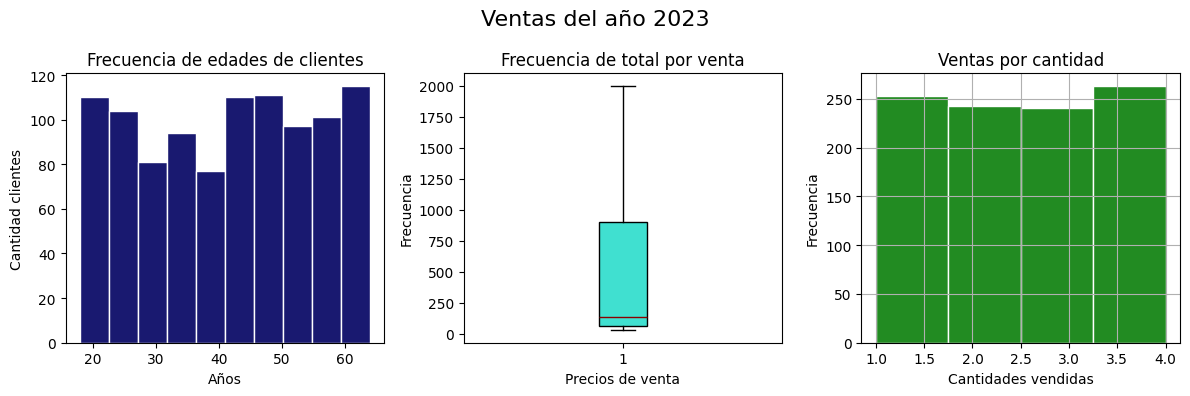

In [140]:
# Creación de gráficos - Edades de clientes, Ventas/frecuencia y Cantidades más frecuentes por venta

# Pongámoslos juntos para que sean más fáciles de ver y comparar
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
edades = df["Age"]
plt.hist(edades, bins = 10, color = "midnightblue", edgecolor = "white")
plt.xlabel("Años")
plt.ylabel("Cantidad clientes")
plt.title("Frecuencia de edades de clientes")

plt.subplot(1, 3, 2)
ventas = df["Total Amount"]
plt.boxplot(ventas, patch_artist= True,
            boxprops = dict(facecolor = "turquoise"),
            flierprops = dict(markeredgecolor = "darkslategray", marker = "d"),
            medianprops = dict(color = "darkred"),
            label = "Ventas")
plt.xlabel("Precios de venta")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de total por venta")

plt.subplot(1, 3, 3)
cantidades = df["Quantity"]
plt.hist(cantidades, bins = 4, color = "forestgreen", edgecolor = "white")
plt.grid(True)
plt.xlabel("Cantidades vendidas")
plt.ylabel("Frecuencia")
plt.title("Ventas por cantidad")
plt.suptitle('Ventas del año 2023', fontsize=16)

plt.tight_layout()
plt.show()

##### Gráficos de línea y dispersión

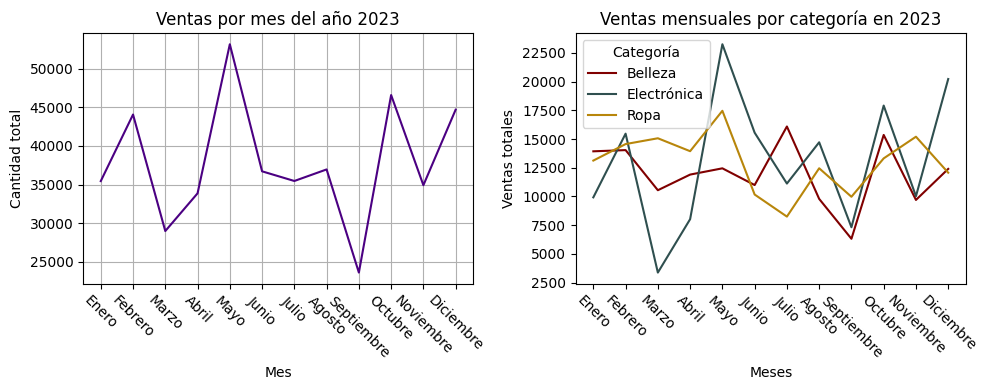

In [110]:
# Importamos datetime para trabajar mejor con fechas
from datetime import datetime

# Formateamos la columna fecha
df["Date"] = pd.to_datetime(df["Date"])

# Agreguemos una tabla de meses y años para hacer esto más sencillo
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

# Ventas por fecha
ventas_mes = df[["Date", "Total Amount"]].sort_values(by = "Date")
# Veamos la data
ventas_mes = df.groupby(["Year", "Month"])["Total Amount"].sum()

# El primer día del próximo año es info insuficiente. Por ello, la sacaremos para este análisis
ventas_mes = df[df["Year"] == 2023]
ventas_totales_mes = ventas_mes.groupby(["Month"])["Total Amount"].sum()
meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]

# Ventas por fecha y categoría
ventas_belleza = df[df["Product Category"] == "Beauty"]
ventas_belleza = ventas_belleza.groupby("Month")["Total Amount"].sum()
ventas_electro = df[df["Product Category"] == "Electronics"]
ventas_electro = ventas_electro.groupby("Month")["Total Amount"].sum()
ventas_ropa = df[df["Product Category"] == "Clothing"]
ventas_ropa = ventas_ropa.groupby("Month")["Total Amount"].sum()

# Gráficos:
plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
# Gráfico de línea
plt.plot(meses, ventas_totales_mes.values, color = "indigo")
plt.grid(True)
plt.xlabel("Mes")
plt.ylabel("Cantidad total")
plt.title("Ventas por mes del año 2023")
plt.xticks(rotation = 315)

plt.subplot(1, 2, 2)
plt.plot(meses, ventas_belleza, color = "maroon", label = "Belleza")
plt.plot(meses, ventas_electro, color = "darkslategray", label = "Electrónica")
plt.plot(meses, ventas_ropa, color = "darkgoldenrod", label = "Ropa")
plt.xlabel("Meses")
plt.ylabel("Ventas totales")
plt.title("Ventas mensuales por categoría en 2023")
plt.xticks(rotation = 315)
plt.legend(title = "Categoría")

plt.tight_layout()
plt.show()


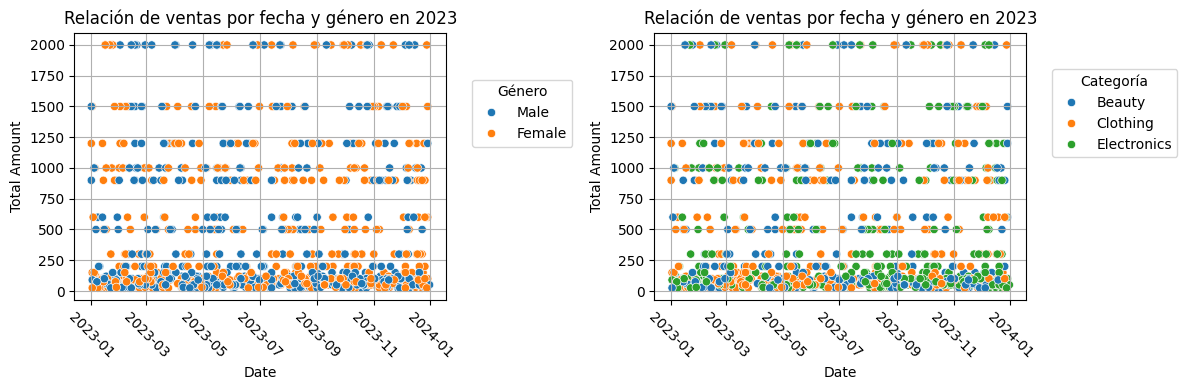

In [123]:
# Importamos seaborn para hacer gráfico de dispersión
import seaborn as sns

# Filtramos el día del año que no corresponde
df_2023 = df[df["Year"] == 2023]

# Grupo de categorías:
plt.figure(figsize = (12, 4))

# Ventas por fecha y género
plt.subplot(1, 2, 1)
sns.scatterplot(data = df_2023, x = "Date", y = "Total Amount", hue = "Gender")
plt.title("Relación de ventas por fecha y género en 2023")
plt.xticks(rotation = 315)
plt.legend(title='Género', loc='center left', bbox_to_anchor=(1.05, 0.7))
plt.grid(True)

#Ventas por fecha y categoría
plt.subplot(1, 2, 2)
sns.scatterplot(data = df_2023, x = "Date", y = "Total Amount", hue = "Product Category")
plt.title("Relación de ventas por fecha y género en 2023")
plt.xticks(rotation = 315)
plt.grid(True)
plt.legend(title='Categoría', loc='center left', bbox_to_anchor=(1.05, 0.7))

plt.tight_layout()
plt.show()

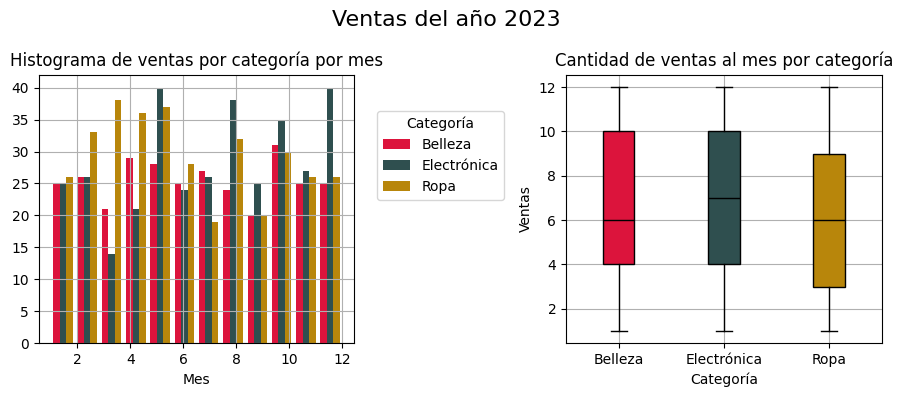

In [139]:
# Comparación de histogramas y boxplots:
plt.figure(figsize = (9, 4))

plt.subplot(1, 2, 1)
plt.hist( x = [df_2023[df_2023["Product Category"] == "Beauty"]["Month"],
               df_2023[df_2023["Product Category"] == "Electronics"]["Month"],
               df_2023[df_2023["Product Category"] == "Clothing"]["Month"]],
               bins = 12, color = ["Crimson", "darkslategrey", "darkgoldenrod"],
               label = ["Belleza", "Electrónica", "Ropa"])
plt.title("Histograma de ventas por categoría por mes")
plt.xlabel("Mes")
plt.legend(title='Categoría', loc='center left', bbox_to_anchor=(1.05, 0.7))
plt.grid(True)

plt.subplot(1, 2, 2)
bp = plt.boxplot(x = [df_2023[df_2023["Product Category"] == "Beauty"]["Month"],
               df_2023[df_2023["Product Category"] == "Electronics"]["Month"],
               df_2023[df_2023["Product Category"] == "Clothing"]["Month"]],
                 tick_labels = ["Belleza", "Electrónica", "Ropa"], patch_artist = True)

color = ["crimson", "darkslategrey", "darkgoldenrod"]

# Asignación de colores
for patch, color in zip(bp['boxes'], color): # Color de cajita
  patch.set_facecolor(color)
for median in bp['medians']: #Color de la media
  median.set(color='black')
for flier in bp['fliers']: # Forma de datos aislados
  flier.set(marker = "*")

plt.xlabel("Categoría")
plt.ylabel("Ventas")
plt.title("Cantidad de ventas al mes por categoría")
plt.grid(True)

plt.suptitle('Ventas del año 2023', fontsize=16)
plt.tight_layout()
plt.show()

#### Conclusiones

De acuerdo a los gráficos y la información mostrada, podemos ver que:
- La edad de los compradores va desde la mayoría de edad hasta gente senior (65 años el mayor)
- Se compra de entre 1 y 4 productos, con poca preferencia entre estos, y la cantidad que menos compran es 3 productos por compra.
- La mayoría de las compras de los clientes no superan los 1000 en precio, y el promedio aproximado es de 150 en precio cada venta.
- Los meses con peores ventas son Marzo y Septiembre, mientras que las mejores son en orden: Mayo, Noviembre y Febrero.
- El mes con las peores ventas para la categoría de belleza es septiembre, mientras que la mejor fue Julio.
- El mes con las peores ventas para la categoría de electrónica es Marzo, mientras que la mejor fue Mayo.
- El mes con las peores ventas para la categoría de ropa es Julio, mientras que el mejor fue Mayo.
- La cantidad de consumo en la tienda por cada género es casi la misma en cada categoría según los gráficos de dispersión.

Para cerrar, lo recomendado es enfocarse en las ventas de productos menores a 1000 en precio dependiendo de la temporada, ya que no es posible encontrar tendencias pronunciadas para estaciones, temporadas, meses festivos ni preferencia de edad ni género. La tienda apela a casi todo público, a excepción de menores de edad.